In [1]:
%matplotlib inline


# For Project 3, by Tony Zhao DBC_UWA 30/05/2021
# Scikit_Learn California Housing Data
# Machine Learning Analysis and Prediction


In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.datasets import fetch_california_housing

In [3]:
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
cal_housing = fetch_california_housing()
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Data Load, Check, Clean, Split for Train and Test

In [5]:
# extract data, target
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
# check X has any nan
X.isnull().values.any()

False

In [9]:
#check if y has any nan?
array_sum = np.sum(y)
array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [10]:
#check X there is any duplicate row?
duplicateRowsDF = X[X.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
Index: []


In [11]:
# data shape
print(X.shape, y.shape)

(20640, 8) (20640,)


In [12]:
# save cal_df into csv for futher operation
cal_df = X.copy()
cal_df["midhouseval"] = y
cal_df.to_csv("~/project3_challenge/cal_housing.csv")
# cal_df.head()

In [13]:
# split the data into train(0.8) and test(0.2), to facilitate use y -= y.mean()

from sklearn.model_selection import train_test_split

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# Test LinearRegression Without Preprocessing, R2 Score = 0.6

In [14]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
t = time()
model.fit(X_train, y_train)
print(f"done in {time() - t:.3f}s")
print(f"Test R2 score: {model.score(X_test, y_test):.2f}")

done in 0.078s
Test R2 score: 0.58


In [16]:
prediction = model.predict(X_test)
pred1_df = pd.DataFrame({"Prediction": prediction, "Actual": y_test})
pd.DataFrame({"Prediction": prediction, "Actual": y_test})

,Prediction,Actual
0,-0.098076,-0.200558
1,0.055155,-0.474558
2,-0.225874,0.451442
3,0.412029,0.287442
4,0.938648,0.655442
...,...,...
4123,-0.126000,-0.145558
4124,-0.330249,-0.075558
4125,-0.645766,-0.943558
4126,-1.173216,-0.604558


Text(0.5, 1.0, 'Prediction vs Actual')

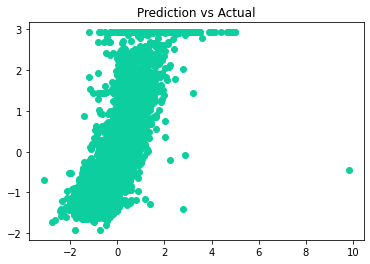

In [17]:
plt.scatter(pred1_df["Prediction"], pred1_df["Actual"], c="#0DCE9E")
plt.title("Prediction vs Actual")

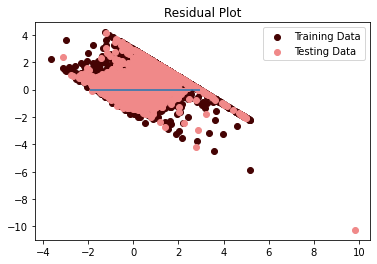

In [18]:
# residual plot
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="#450303", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="#F08989", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Test with Preprocessing StandardScaler and LinearRegressor
# Test R2 Score = 0.61

In [19]:
#Preprocessing X_train, X_test with StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

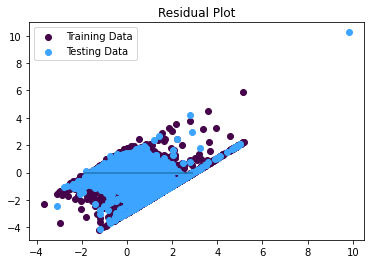

In [20]:
#Train Model2 and calculate the residual plot
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train, c="#450349", label="Training Data")
plt.scatter(model2.predict(X_test_scaled), model2.predict(X_test_scaled) - y_test, c="#3DA5FF", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [21]:
predictions = model2.predict(X_test_scaled)
MSE2 = mean_squared_error(y_test, predictions)
r2_2 = model2.score(X_test_scaled, y_test)

print(f"MSE: {MSE2}, R2: {r2_2}")

MSE: 0.5424399699364032, R2: 0.5849066870027483


# Test Lasso Model with Test R2 = 0.60

In [22]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train)

predictions = lasso.predict(X_test_scaled)

MSE3 = mean_squared_error(y_test, predictions)
r2_3 = lasso.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE3}, R2: {r2_3}")

MSE: 0.5293988601009743, R2: 0.5948861829594787


# Test ElasticNet Model with Test R2 = 0.60

In [23]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

predictions4 = elasticnet.predict(X_test_scaled)

MSE4 = mean_squared_error(y_test, predictions4)
r2_4 = elasticnet.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE4}, R2: {r2_4}")

MSE: 0.5326994411267947, R2: 0.59236046732502


# Test Ridge Model with Test R2 = 0.61

In [24]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

predictions5 = ridge.predict(X_test_scaled)

MSE5 = mean_squared_error(y_test, predictions5)
r2_5 = ridge.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE5}, R2: {r2_5}")

MSE: 0.5424394575615991, R2: 0.584907079089185


# Test Preprocessing QuantileTransformer, and MLPRegressor
# Test R2 Score = 0.79

In [25]:
# build pipeline to do the job and check the score
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 5.345s
Test R2 score: 0.80


In [26]:
# build predction df with columns Prediction and Actual
predicted = est.predict(X_test)
pred_df = pd.DataFrame({"Prediction": predicted, "Actual": y_test})

In [27]:
# alculate MeanSquared Error(MSE) and R-Squared (R2)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.25489952872596866
R-squared (R2 ): 0.8049423056477466


Text(0.5, 1.0, 'Prediction vs Actual')

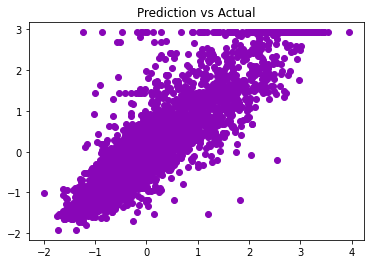

In [28]:
# plot prediction vs Actual
plt.scatter(pred_df["Prediction"], pred_df["Actual"], c="#8806B7")
plt.title("Prediction vs Actual")

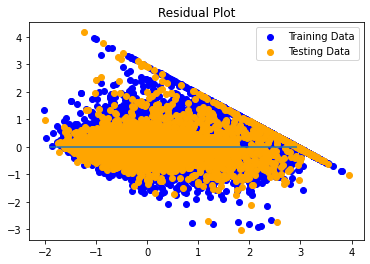

In [29]:
# residual plot
plt.scatter(est.predict(X_train), y_train - est.predict(X_train), c="blue", label="Training Data")
plt.scatter(est.predict(X_test), y_test - est.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Test HistGradientBoostingRegressor, 
# Test R2 Score = 0.84 and MSE = 0.22

In [30]:
# Use HistGradientBoostingRegressor and calculate r2 score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic2 = time()
est2 = HistGradientBoostingRegressor()
est2.fit(X_train, y_train)
print(f"done in {time() - tic2:.3f}s")
print(f"Test R2 score: {est2.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 1.260s
Test R2 score: 0.84


In [31]:
# build predction df with columns Prediction and Actual
predicted2 = est2.predict(X_test)
pd.DataFrame({"Prediction": predicted2, "Actual": y_test})

,Prediction,Actual
0,-0.373639,-0.200558
1,0.406177,-0.474558
2,0.460641,0.451442
3,0.118339,0.287442
4,0.814161,0.655442
...,...,...
4123,0.298218,-0.145558
4124,-0.417055,-0.075558
4125,-0.900561,-0.943558
4126,-0.916920,-0.604558


In [32]:
mse6 = mean_squared_error(y_test, predicted2)
print(f"Mean Squared Error (MSE): {mse6}")

Mean Squared Error (MSE): 0.21055849327970175


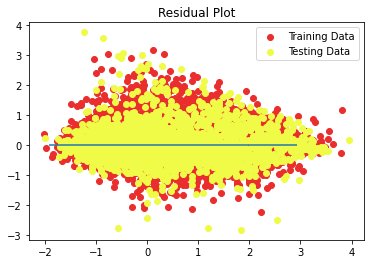

In [33]:
# residual plot
plt.scatter(est.predict(X_train), y_train - est2.predict(X_train), c="#EA2E2E", label="Training Data")
plt.scatter(est.predict(X_test), y_test - est2.predict(X_test), c="#EFFB46", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()